In [1]:
import networkx as nx
import math
import csv
import random as rand
import sys
import time
import itertools

In [2]:
from mpl_toolkits import mplot3d

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def UpdateDeg(A, nodes):
    deg_dict = {}
    n = len(nodes)  #len(A) ---> some ppl get issues when trying len() on sparse matrixes!
    B = A.sum(axis = 1)
    i = 0
    for node_id in list(nodes):
        deg_dict[node_id] = B[i, 0]
        i += 1
    return deg_dict

In [6]:
def CmtyGirvanNewmanStep(G):
    
    init_ncomp = nx.number_connected_components(G)    #no of components
    ncomp = init_ncomp
    while ncomp <= init_ncomp:
        bw = nx.edge_betweenness_centrality(G, weight='weight')    #edge betweenness for G
        #find the edge with max centrality
        max_ = max(bw.values())
        #find the edge with the highest centrality and remove all of them if there is more than one!
        for k, v in bw.items():
            if float(v) == max_:
                G.remove_edge(k[0],k[1])    #remove the central edge
        ncomp = nx.number_connected_components(G)    #recalculate the no of components


# This method compute the modularity of current split
def _GirvanNewmanGetModularity(G, deg_, m_):
    New_A = nx.adj_matrix(G)
    New_deg = {}
    New_deg = UpdateDeg(New_A, G.nodes())
    #Let's compute the Q
    comps = nx.connected_components(G)    #list of components    
    print('No of communities in decomposed G: {}'.format(nx.number_connected_components(G)))
    Mod = 0    #Modularity of a given partitionning
    for c in comps:
        EWC = 0    #no of edges within a community
        RE = 0    #no of random edges
        for u in c:
            EWC += New_deg[u]
            RE += deg_[u]        #count the probability of a random edge
        Mod += ( float(EWC) - float(RE*RE)/float(2*m_) )
    Mod = Mod/float(2*m_)

    return Mod


def UpdateDeg(A, nodes):
    deg_dict = {}
    n = len(nodes)  #len(A) ---> some ppl get issues when trying len() on sparse matrixes!
    B = A.sum(axis = 1)
    i = 0
    for node_id in list(nodes):
        deg_dict[node_id] = B[i, 0]
        i += 1
    return deg_dict


# This method runs GirvanNewman algorithm and find the best community split by maximizing modularity measure
def runGirvanNewman(G, Orig_deg, m_):
    #let's find the best split of the graph
    BestQ = 0.0
    Q = 0.0
    mod=list()
    mod.append(Q)
    steps=dict()
    f = open("dict.txt","w")
    stime = time.time()
    count = 0
    while True:    
        CmtyGirvanNewmanStep(G)
        Q = _GirvanNewmanGetModularity(G, Orig_deg, m_);
        mod.append(Q)
        print("Modularity of decomposed G: {}".format(Q))
        if Q > BestQ:
            BestQ = Q
            Bestcomps = list(nx.connected_components(G))    #Best Split
            print("Identified components: {}".format(Bestcomps))
        if G.number_of_edges() == 0:
            break
        count = count+1
        f.write( f" {time.time()-stime} , { Q } \n" )
        print(f"time in step {count} : {time.time()-stime }")
    if BestQ > 0.0:
        print("Max modularity found (Q): {} and number of communities: {}".format(BestQ, len(Bestcomps)))
        print("Graph communities: {}".format(Bestcomps))
    else:
        print("Max modularity (Q):", BestQ)
   
    
    f.close()
    plt.plot(mod)
    plt.savefig("plot.png")
    plt.show()

In [7]:
#G = nx.read_edgelist("soc-hamsterster.edges",create_using=nx.Graph(), nodetype = int)
#G = nx.read_edgelist("quakers_edgelist.csv",delimiter=',',create_using=nx.DiGraph(),nodetype= str)
#G = nx.read_edgelist("ub_sample_data.csv",delimiter=',',create_using=nx.DiGraph(),nodetype= str)
#G = nx.read_edgelist("data/fb-pages-food/fb-pages-food.edges",delimiter=',',create_using=nx.Graph(),nodetype= str)
#G = nx.read_edgelist("data/soc-firm-hi-tech/soc-firm-hi-tech.txt",delimiter=',',create_using=nx.Graph(),nodetype= str)
#G = nx.read_edgelist("data/soc-karate/soc-karate.mtx",delimiter=' ',create_using=nx.Graph(),nodetype= str)
G = nx.read_edgelist("data/soc-wiki-Vote/soc-wiki-Vote.mtx",delimiter=' ',create_using=nx.Graph(),nodetype= str)
#G = nx.read_edgelist("data/soc-dolphins/soc-dolphins.mtx",delimiter=',',create_using=nx.Graph(),nodetype= str)
#G = nx.read_edgelist("data/soc-tribes/soc-tribes.edges",delimiter=',',create_using=nx.Graph(),nodetype= str)


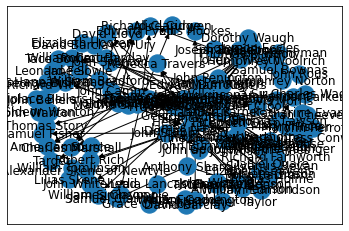

In [7]:
nx.draw_networkx(G)

In [8]:
fig = plt.figure()
fig.
ax = plt.axes(projection='3d')

SyntaxError: invalid syntax (<ipython-input-8-61719394cf71>, line 2)

In [21]:
G = G.to_undirected()

In [8]:
#G = nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())


#G = nx.karate_club_graph()



n = G.number_of_nodes()    #|V|
e = len(G.edges)
A = nx.adj_matrix(G)    #adjacenct matrix
print(f"number of nodes =   {n} \nnumber of edges =   {e} ")

m_ = 0.0    #the weighted version for number of edges
for i in range(0,n):
    for j in range(0,n):
        m_ += A[i,j]
m_ = m_/2.0

#m_ = e
#calculate the weighted degree for each node
Orig_deg = {}
Orig_deg = UpdateDeg(A, G.nodes())

number of nodes =   889 
number of edges =   2914 


No of communities in decomposed G: 2
Modularity of decomposed G: 0.05407567848678828
Identified components: [{'44', '18', '28', '80', '16', '66', '23', '27', '67', '7', '69', '1', '60', '31', '39', '45', '15', '83', '47', '4', '86', '82', '3', '9', '97', '48', '46', '19', '12', '36', '87', '64', '91', '81', '37', '54', '17', '117', '6', '34', '52', '8', '11', '76', '42', '24', '2', '26', '21', '10', '50', '40', '32', '30', '33', '20', '79', '29'}, {'300', '382', '694', '647', '85', '457', '245', '487', '519', '264', '722', '458', '394', '836', '405', '365', '545', '606', '371', '534', '854', '787', '887', '369', '108', '620', '165', '581', '287', '312', '57', '217', '143', '110', '442', '652', '880', '173', '860', '172', '789', '490', '197', '661', '135', '208', '580', '495', '676', '341', '356', '403', '474', '882', '666', '420', '550', '309', '319', '212', '274', '179', '826', '414', '696', '669', '374', '674', '118', '703', '873', '230', '183', '765', '811', '49', '753', '51', '476'

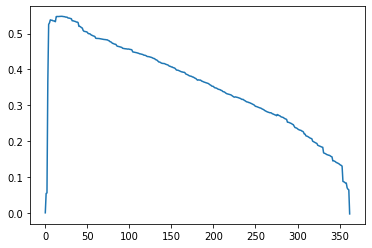

In [9]:
start = time.time()

#run Newman alg
runGirvanNewman(G, Orig_deg, m_)



end = time.time()

In [10]:
print(f"Runtime of the program is {end - start}")

NameError: name 'end' is not defined

In [14]:
#G = nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())

In [15]:
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.9909660816192627


<h3>visualisation :</h3>

In [26]:
from scipy.cluster.hierarchy import dendrogram
import dendrogram_from_girvan_newman as dgn

In [27]:
C = max(nx.connected_components(G),key=len) 

In [28]:
partitions = dgn.girvan_newman_partitions(G)

TypeError: Bad graph type: do not use a graph with more connected components

In [ ]:
agglomerative_mat = dgn.agglomerative_matrix(G, partitions)